<a href="https://colab.research.google.com/github/Faouzi-Slimi/python_Avancee/blob/main/GanFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Data
from keras.datasets import fashion_mnist
import numpy as np
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()
xtrain = xtrain.astype(np.float32) / 255

print(xtrain.shape)

(60000, 28, 28)


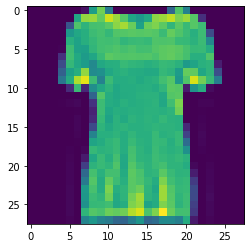

In [2]:
# plot

import matplotlib.pyplot as plt
plt.imshow(xtrain[10])

In [3]:
# generate a matrix randomly
from numpy.random import randn , randint
def generate_laten_point(latin_dim,n_samples):
  x_input = randn(latin_dim*n_samples)
  z_input = x_input.reshape(n_samples,latin_dim)
  return z_input



In [4]:
z_input = generate_laten_point(64,100)
print(z_input)

[[ 0.31404144 -0.46425653 -0.03003409 ... -1.46996957 -1.64641573
   2.53655446]
 [-0.33915988  0.96647825 -0.30877505 ...  0.10470739  0.6814217
  -0.04326198]
 [ 1.0000008   1.12030508 -2.12657949 ... -1.62191708  0.09350047
   1.25294883]
 ...
 [-0.16810218  0.06129319  0.02122407 ... -1.23707036  1.61677737
   1.38643409]
 [-0.25499317  1.20221408  0.49581778 ... -0.35319586 -1.3378274
   1.44617625]
 [ 1.01166217 -0.45876442 -1.0812897  ...  0.63326411  0.15852037
  -0.99329634]]


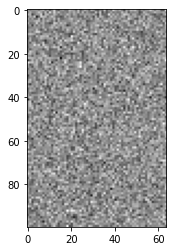

In [5]:
plt.imshow(z_input,'gray')

In [28]:
from numpy import zeros, ones, expand_dims, asarray

from numpy.random import randn, randint

 

from tensorflow.keras.optimizers import Adam

from keras.models import Model, load_model

from keras.layers import Input, Dense, Reshape, Flatten

from keras.layers import Conv2D, Conv2DTranspose, Concatenate

from keras.layers import LeakyReLU, Dropout, Embedding

from keras.layers import BatchNormalization, Activation

from keras import initializers

from keras.initializers import RandomNormal

from tensorflow.keras.optimizers import Adam, RMSprop, SGD

import matplotlib.pyplot as plt 

import numpy as np

from math import sqrt

 

In [6]:
def generate_real_samples(xtrain,n_samples):
  ix = randint(0,xtrain.shape[0],n_samples)
  x = xtrain[ix]
  y = np.ones((n_samples,1))
  return x,y

In [7]:
real_data,y_real = generate_real_samples(xtrain,64)
real_data.shape

(64, 28, 28)

In [8]:
def generate_fake_samples(generator,latent_dim,n_samples):
  z_input = generate_laten_point(latent_dim,n_samples)
  images = generator.predict(z_input)
  return images,z_input

In [26]:
from tensorflow.keras.initializers import RandomNormal
from keras.layers import Input,Dense,LeakyReLU,Activation,Reshape
from tensorflow.keras import Model
def define_generator(latent_dim):
  init = RandomNormal(stddev=0.02)
  in_lat =  Input(shape=(latent_dim,))
  gen = Dense(256,kernel_initializer = init)(in_lat)
  gen = LeakyReLU(alpha=0.2)(gen)
  gen = Dense(512,kernel_initializer = init)(in_lat)
  gen = LeakyReLU(alpha=0.2)(gen)
  gen = Dense(1024,kernel_initializer = init)(in_lat)
  gen = LeakyReLU(alpha=0.2)(gen)

  gen = Dense(28*28*1,kernel_initializer = init)(in_lat)
  out_layer = Activation('sigmoid')(gen)
  out_layer = Reshape((28,28,1))(out_layer)
  model = Model(in_lat,out_layer)

  return model


In [27]:
generator = define_generator(100)

In [29]:
images,y = generate_fake_samples(generator,100,64)

2/2 [==============================] - 3s 7ms/step


In [32]:
images.shape



(64, 28, 28, 1)

In [33]:
def define_discriminator(in_shape=(28, 28, 1)):

    in_image = Input(shape=in_shape)

    fe = Flatten()(in_image)

    fe = Dense(1024)(fe)

    fe = LeakyReLU(alpha=0.2)(fe)

    fe = Dropout(0.3)(fe)

    fe = Dense(512)(fe)

    fe = LeakyReLU(alpha=0.2)(fe)

    fe = Dropout(0.3)(fe)

    fe = Dense(256)(fe)

    fe = LeakyReLU(alpha=0.2)(fe)

    fe = Dropout(0.3)(fe)

    out = Dense(1, activation='sigmoid')(fe)

    model = Model(in_image, out)

    opt = Adam(lr=0.0002, beta_1=0.5) 

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

 

In [ ]:
 def define_gan(g_model,d_model):
   d_model.trainable = False
   gan_output = d_model(g_model.output)
   model = Model()